In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [12]:
vibration1_df = pd.read_excel('alBeam.xlsx',sheet_name=['Al Beam','Composite Beam','vibration48'])

# Aluminium Beam

In [13]:
AlBeam_Data = vibration1_df['Al Beam']
AlBeam_Data

,Accelerometer,Strain Gauge Data,Time
0,-4.210822,0.000148,0.000
1,-4.283377,0.000151,0.001
2,-4.326943,0.000151,0.002
3,-4.340289,0.000151,0.003
4,-4.324146,0.000152,0.004
...,...,...,...
995,-1.236253,0.000151,0.995
996,-1.473798,0.000154,0.996
997,-1.703194,0.000152,0.997
998,-1.920988,0.000152,0.998


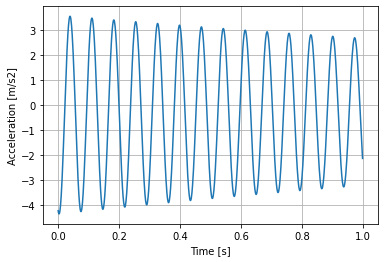

In [14]:
plt.grid();
plt.plot(AlBeam_Data['Time'],AlBeam_Data['Accelerometer']);plt.xlabel('Time [s]');plt.ylabel('Acceleration [m/s2]');

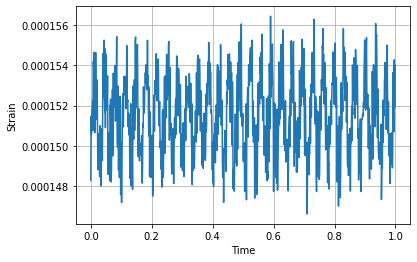

In [15]:
plt.grid();
plt.plot(AlBeam_Data['Time'],AlBeam_Data['Strain Gauge Data']);plt.xlabel('Time');plt.ylabel('Strain');

In [16]:
b1 = 0.01
h1 =0.002
l1 = 0.2
E =  69*pow(10,9)
I1 = (b1*pow(h1,3)/12)
A1 = b1*h1
M = 11.27*pow(10,-3)
rho1 = M/(A1*l1)

In [17]:
w01 = pow((1.875/l1),2)*np.sqrt((E*I1)/(rho1*A1))
w11 = pow((4.694/l1),2)*np.sqrt((E*I1)/(rho1*A1))
w21 = pow((7.85/l1),2)*np.sqrt((E*I1)/(rho1*A1))
w31 = pow((10.995/l1),2)*np.sqrt((E*I1)/(rho1*A1))

In [18]:
print(f"I1 = {I1}\nA1 = {A1}\nrho = {rho1}\nw01 = {w01}\nw11 = {w11}\nw21 = {w21}\nw31 = {w31}")

I1 = 6.666666666666667e-12
A1 = 2e-05
rho = 2817.4999999999995
w01 = 251.11607142857144
w11 = 1573.8311428571426
w21 = 4401.607142857141
w31 = 8635.001785714283


### Fourier Transformation 

In [19]:
dt = AlBeam_Data['Time'][1]-AlBeam_Data['Time'][0]
N = len(AlBeam_Data['Accelerometer'])

In [67]:
F_Al = np.fft.fft(AlBeam_Data['Accelerometer'])
Amplitude_Al = 2.0*np.abs(F_Al[0:int(N/2)])/N
Frequency_Al = np.linspace(0.0,1.0/(2*dt),int(N/2))

In [62]:
px.line(x=Frequency_Al,y=Amplitude_Al,log_y=True)

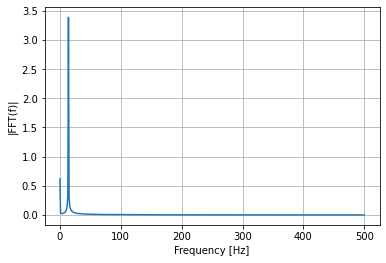

In [22]:
plt.grid();
plt.plot(Frequency_Al,Amplitude_Al);plt.xlabel('Frequency [Hz]');plt.ylabel('|FFT(f)|');

In [23]:
F_Al_strain = np.fft.fft(AlBeam_Data['Strain Gauge Data'])
Amplitude_Al_strain = 2.0*np.abs(F_Al_strain[0:int(N)])/N
Frequency_Al_strain = np.linspace(0.0,1.0/(dt),int(N))

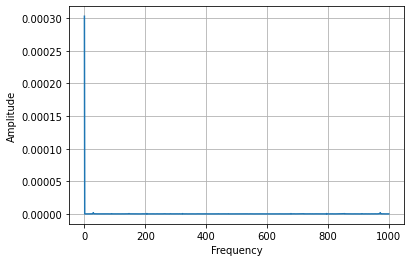

In [24]:
plt.grid();
plt.plot(Frequency_Al_strain,Amplitude_Al_strain);plt.xlabel('Frequency');plt.ylabel('Amplitude');

# Composite Beam

In [25]:
CompositeBeam_Data = vibration1_df['Composite Beam']
CompositeBeam_Data

,Accelerometer,Strain Gauge Data,Time
0,-0.110702,0.000152,0.000
1,-0.103641,0.000150,0.001
2,-0.096022,0.000147,0.002
3,-0.088173,0.000149,0.003
4,-0.079823,0.000150,0.004
...,...,...,...
995,-0.100469,0.000149,0.995
996,-0.101080,0.000152,0.996
997,-0.099967,0.000149,0.997
998,-0.097368,0.000148,0.998


In [26]:
b2 = 0.01
h2 = 0.0057
l2 = 0.2
E =  47.4*pow(10,9)
I2 = (b2*pow(h2,3)/12)
A2 = b2*h2
M = 27.75*pow(10,-3)
rho2 = M/(A2*l2)

In [27]:
w02 = pow((1.875/l2),2)*np.sqrt((E*I2)/(rho2*A2))
w12 = pow((4.694/l2),2)*np.sqrt((E*I2)/(rho2*A2))
w22 = pow((7.85/l2),2)*np.sqrt((E*I2)/(rho2*A2))
w32 = pow((10.995/l2),2)*np.sqrt((E*I2)/(rho2*A2))

In [28]:
print(f"I2 = {I2}\nA2 = {A2}\nrho = {rho2}\nw02 = {w02}\nw12 = {w12}\nw22 = {w22}\nw32 = {w32}")

I2 = 1.543275e-10
A2 = 5.7e-05
rho = 2434.210526315789
w02 = 638.1707403302619
w12 = 3999.6364226240025
w22 = 11185.970189084886
w32 = 21944.455609683584


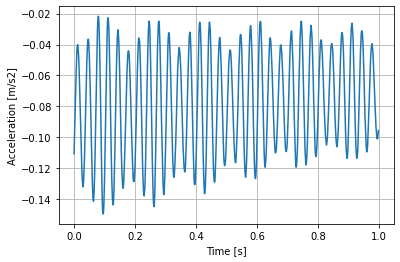

In [29]:
plt.grid();
plt.plot(CompositeBeam_Data['Time'],CompositeBeam_Data['Accelerometer']);plt.xlabel('Time [s]');plt.ylabel('Acceleration [m/s2]');

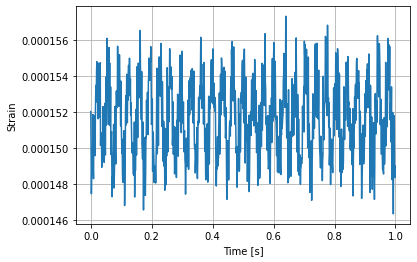

In [30]:
plt.grid();
plt.plot(CompositeBeam_Data['Time'],CompositeBeam_Data['Strain Gauge Data']);plt.xlabel('Time [s]');plt.ylabel('Strain');

### Fourier Transformation

In [31]:
dt1 = CompositeBeam_Data['Time'][1]-CompositeBeam_Data['Time'][0]
N1 = len(CompositeBeam_Data['Accelerometer'])

In [65]:
F_Cm = np.fft.fft(CompositeBeam_Data['Accelerometer'])
Amplitude_Cm = 2.0*np.abs(F_Cm[0:int(N1/2)])/N1
Frequency_Cm = np.linspace(0.0,1.0/(2*dt1),int(N1/2))

In [66]:
px.line(x=Frequency_Cm,y=Amplitude_Cm,log_y=True)

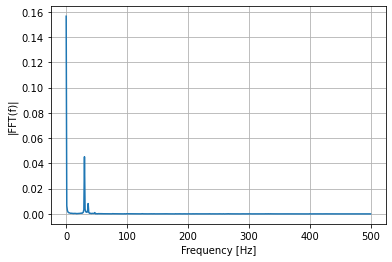

In [34]:
plt.grid();
plt.plot(Frequency_Cm,Amplitude_Cm);plt.xlabel('Frequency [Hz]');plt.ylabel('|FFT(f)|');

In [35]:
F_Cm_strain = np.fft.fft(CompositeBeam_Data['Strain Gauge Data'])
Amplitude_Cm_strain = 2.0*np.abs(F_Cm_strain[0:int(N1)])/N1
Frequency_Cm_starin = np.linspace(0.0,1.0/(dt1),int(N1))

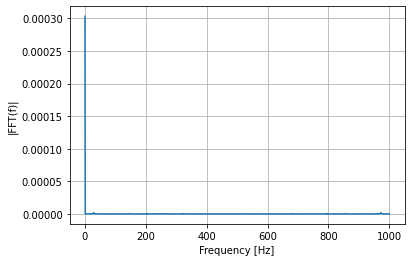

In [36]:
plt.grid();
plt.plot(Frequency_Cm_starin,Amplitude_Cm_strain);plt.xlabel('Frequency [Hz]');plt.ylabel('|FFT(f)|');

# Forced Vibration

In [37]:
vibration48_data = vibration1_df['vibration48']
vibration48_data

,Accelerometer,Strain Gauge Data,Time
0,2.139563,-0.000101,0.000
1,2.094152,-0.000102,0.001
2,2.045581,-0.000102,0.002
3,1.991692,-0.000103,0.003
4,1.929827,-0.000103,0.004
...,...,...,...
995,0.740420,-0.000039,0.995
996,0.815481,-0.000041,0.996
997,0.887808,-0.000044,0.997
998,0.957037,-0.000046,0.998


In [58]:
b3 = 0.025
h3 = 0.0035
l3 = 1
E =  69*pow(10,9)
I3 = ((b3*np.power(h3,3))/12)
A3 = b3*h3
rho3 = 2700

In [59]:
w03 = np.power((1.875/l3),2)*np.sqrt((E*I3)/(rho3*A3))
w13 = np.power((4.694/l3),2)*np.sqrt((E*I3)/(rho3*A3))
w23 = np.power((7.85/l3),2)*np.sqrt((E*I3)/(rho3*A3))
w33 = np.power((10.995/l3),2)*np.sqrt((E*I3)/(rho3*A3))

In [60]:
print(f"I3 = {I3}\nA3 = {A3}\nrho = {rho3}\nw03 = {w03}\nw13 = {w13}\nw23 = {w23}\nw33 = {w33}")

I3 = 8.932291666666668e-11
A3 = 8.750000000000001e-05
rho = 2700
w03 = 17.956538819520677
w13 = 112.53983009256912
w23 = 314.74540470212634
w33 = 617.4624502912924


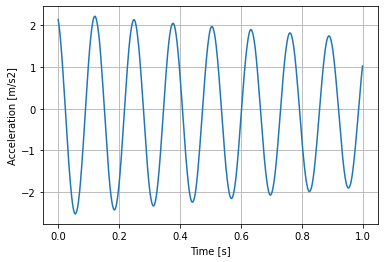

In [41]:
plt.grid();
plt.plot(vibration48_data['Time'],vibration48_data['Accelerometer']);plt.xlabel('Time [s]');plt.ylabel('Acceleration [m/s2]');

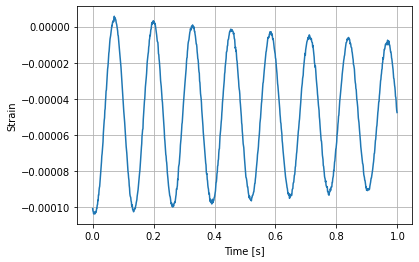

In [42]:
plt.grid();
plt.plot(vibration48_data['Time'],vibration48_data['Strain Gauge Data']);plt.xlabel('Time [s]');plt.ylabel('Strain');

### Fourier Transformation 

In [43]:
dt = vibration48_data['Time'][1]-vibration48_data['Time'][0]
N = len(vibration48_data['Accelerometer'])

In [44]:
F_Al48 = np.fft.fft(vibration48_data['Accelerometer'])
Amplitude_Al48 = 2.0*np.abs(F_Al48[0:int(N/2)])/N
Frequency_Al48 = np.linspace(0.0,1.0/(2*dt),int(N/2))

In [49]:
px.line(x=Frequency_Al48,y=Amplitude_Al48,log_y=True)

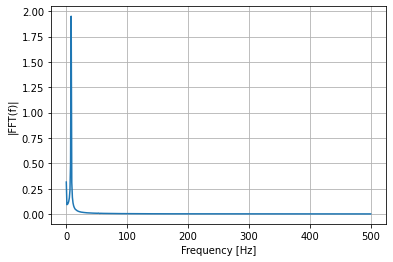

In [52]:
plt.grid();
plt.plot(Frequency_Al48,Amplitude_Al48);plt.xlabel('Frequency [Hz]');plt.ylabel('|FFT(f)|');

In [47]:
F_Al_strain48 = np.fft.fft(vibration48_data['Strain Gauge Data'])
Amplitude_Al_strain48 = 2.0*np.abs(F_Al_strain48)/N
Frequency_Al_strain48 = np.linspace(0.0,1.0/(dt),int(N))

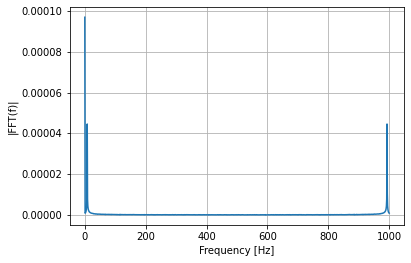

In [48]:
plt.grid();
plt.plot(Frequency_Al_strain48,Amplitude_Al_strain48);plt.xlabel('Frequency [Hz]');plt.ylabel('|FFT(f)|');